#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.
/Users/lishunbin/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/lishunbin/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/lishunbin/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/lishunbin/opt/anaconda3/l

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 35s 0us/step


In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [86]:
model = Sequential()

In [87]:
#卷積層1

In [88]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [89]:
model.add(Dropout(rate=0.25))

In [90]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [91]:
#卷積層2與池化層2

In [92]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [93]:
model.add(Dropout(0.25))

In [94]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [95]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [96]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [97]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [98]:
model.add(Dense(10, activation='softmax'))

In [99]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [100]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

### Categorical Crossentropy

In [101]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [102]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, 
                          validation_split=0.2, 
                          epochs=50, batch_size=512, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 100s 2ms/step - loss: 2.2696 - accuracy: 0.1403 - val_loss: 2.2337 - val_accuracy: 0.2094
Epoch 2/50
40000/40000 [==============================] - 96s 2ms/step - loss: 2.1604 - accuracy: 0.2119 - val_loss: 2.1410 - val_accuracy: 0.2721
Epoch 3/50
40000/40000 [==============================] - 105s 3ms/step - loss: 2.0577 - accuracy: 0.2481 - val_loss: 2.1153 - val_accuracy: 0.2361
Epoch 4/50
40000/40000 [==============================] - 97s 2ms/step - loss: 2.0060 - accuracy: 0.2719 - val_loss: 2.0310 - val_accuracy: 0.2878
Epoch 5/50
40000/40000 [==============================] - 95s 2ms/step - loss: 1.9731 - accuracy: 0.2899 - val_loss: 1.9990 - val_accuracy: 0.3217
Epoch 6/50
40000/40000 [==============================] - 95s 2ms/step - loss: 1.9392 - accuracy: 0.3052 - val_loss: 1.9694 - val_accuracy: 0.3333
Epoch 7/50
40000/40000 [==============================] - 95s 2ms/

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

# draw function
def show_acc(train_acc, test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

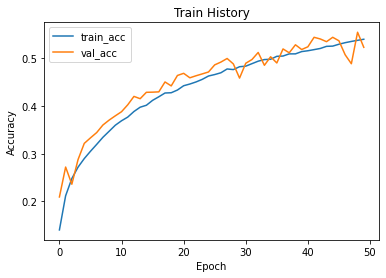

In [104]:
show_acc('accuracy', 'val_accuracy')
# 因為keras庫的版本不同，所以要把acc改成accuracy

In [105]:
def show_loss(train_acc, test_acc):
    plt.plot(train_history.history['loss'])
    plt.plot(train_history.history['val_loss'])
    plt.title('Train History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train_loss', 'val_loss'], loc='upper left')
    plt.show()

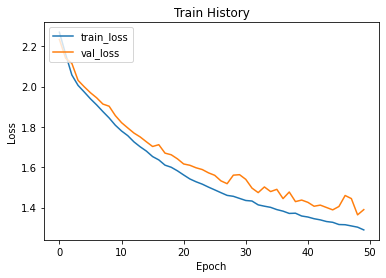

In [106]:
show_loss('loss', 'val_loss')

In [107]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('loss: ', scores[0],
      '\naccuracy: ',scores[1])

10000/10000 [==============================] - 9s 897us/step

loss:  1.375065787124634 
accuracy:  0.5257999897003174


### MSE

In [108]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

In [109]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, 
                          validation_split=0.2, 
                          epochs=50, batch_size=512, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 98s 2ms/step - loss: 0.0594 - accuracy: 0.5430 - val_loss: 0.0616 - val_accuracy: 0.5595
Epoch 2/50
40000/40000 [==============================] - 94s 2ms/step - loss: 0.0591 - accuracy: 0.5447 - val_loss: 0.0615 - val_accuracy: 0.5620
Epoch 3/50
40000/40000 [==============================] - 95s 2ms/step - loss: 0.0588 - accuracy: 0.5470 - val_loss: 0.0616 - val_accuracy: 0.5580
Epoch 4/50
40000/40000 [==============================] - 107s 3ms/step - loss: 0.0590 - accuracy: 0.5454 - val_loss: 0.0615 - val_accuracy: 0.5609
Epoch 5/50
40000/40000 [==============================] - 118s 3ms/step - loss: 0.0590 - accuracy: 0.5458 - val_loss: 0.0614 - val_accuracy: 0.5608
Epoch 6/50
40000/40000 [==============================] - 100s 3ms/step - loss: 0.0588 - accuracy: 0.5494 - val_loss: 0.0615 - val_accuracy: 0.5596
Epoch 7/50
40000/40000 [==============================] - 107s 3m

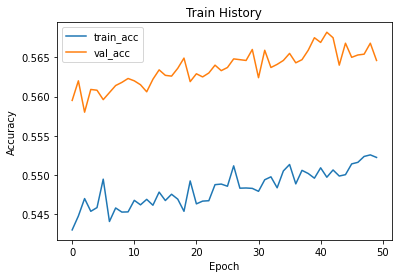

In [110]:
show_acc('accuracy', 'val_accuracy')

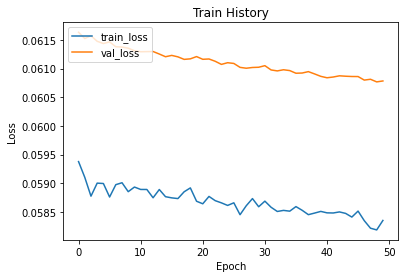

In [111]:
show_loss('loss', 'val_loss')

In [112]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('loss: ', scores[0],
      '\naccuracy: ',scores[1])

10000/10000 [==============================] - 10s 958us/step

loss:  0.06038566933870316 
accuracy:  0.5626999735832214


### Binary Crossentropy

In [113]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [114]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, 
                          validation_split=0.2, 
                          epochs=50, batch_size=512, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 122s 3ms/step - loss: 0.1982 - accuracy: 0.9225 - val_loss: 0.2078 - val_accuracy: 0.9173
Epoch 2/50
40000/40000 [==============================] - 121s 3ms/step - loss: 0.1979 - accuracy: 0.9224 - val_loss: 0.2081 - val_accuracy: 0.9172
Epoch 3/50
40000/40000 [==============================] - 124s 3ms/step - loss: 0.1979 - accuracy: 0.9224 - val_loss: 0.2072 - val_accuracy: 0.9173
Epoch 4/50
40000/40000 [==============================] - 117s 3ms/step - loss: 0.1982 - accuracy: 0.9222 - val_loss: 0.2076 - val_accuracy: 0.9173
Epoch 5/50
40000/40000 [==============================] - 124s 3ms/step - loss: 0.1977 - accuracy: 0.9224 - val_loss: 0.2078 - val_accuracy: 0.9174
Epoch 6/50
40000/40000 [==============================] - 122s 3ms/step - loss: 0.1980 - accuracy: 0.9226 - val_loss: 0.2077 - val_accuracy: 0.9173
Epoch 7/50
40000/40000 [==============================] - 132s

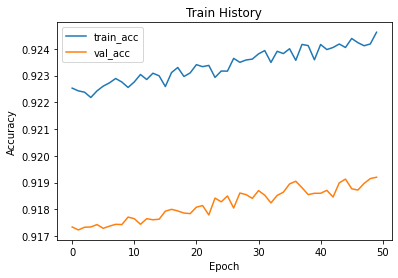

In [115]:
show_acc('accuracy', 'val_accuracy')

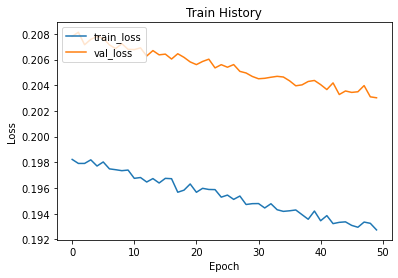

In [116]:
show_loss('loss', 'val_loss')

In [117]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('loss: ', scores[0],
      '\naccuracy: ',scores[1])

10000/10000 [==============================] - 10s 979us/step

loss:  0.20112048008441924 
accuracy:  0.9198201298713684
